***
# Analysis of the penguins data set
***


#### 
The Palmmer Penguin dataset consists of three species of penguins; Adelie, Gentoo and Chinstrap found in Biscoe, Dream and Torgersen Island in Australia.

The analysis was started off by importing the necessary libraries needded for data analysis, exploration, manipulation and visualization.
Pandas was used for exploring the dataframe, Numpy - numerical arrays was utilized for data analysis while Matplotlib was used for plotting data in the form of barcharts, histogram and other plots.

### Libraries/Prerequisites

In [2]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #setting seaborn as default style for plots when using matplotlib
print (np.__version__)



1.24.3


In [3]:
#fetch data from the web url
#importing the raw penguin dataset using pandas and assigns the resulting dataframe to the variable penguin
penguin = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
print (penguin.to_string()) #converts the data set to string and presents it in a scrollable pattern

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    MALE
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  FEMALE
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    MALE
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    MALE
8       Adelie  Torgersen            34.1           18.1              193.0       3475.0     NaN
9       Adelie  Torgersen     

Scrolling through the datsets showed that the data contain some missing values represented as NAot a Number (NA). It is necessary to deal with missing values to avoid imprecision in the analysis.

In [4]:
# Checking for missings values in the dataset
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## outlier test
## replace missing values with mean
## sex can be replaced with mode
##  sorting through the missing values

In [5]:
pd.DataFrame(penguin)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
#correlation between body mass and sex
#specie and body mass, flipper legth, bill legth etc

In [7]:
#P rawenguin data set
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
###show the number of rows and columns with the heading inclusive
print(penguin.shape)
penguin.__dataframe__

(344, 7)


<bound method DataFrame.__dataframe__ of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0   

### Data Exploration and understanding the data structure

In [9]:
#understanding the data structure
#this diplays the first five rows of the data
print(penguin.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [10]:
# displays the last 5 rows of the dataset
print (penguin.tail())

    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  


In [11]:
#data exploration
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
#isolating the variables in the index data
penguin.iloc[0]


species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [13]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [14]:
penguin['species']


0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [15]:
penguin['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [16]:
penguin.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [17]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [18]:
#Checking for missings values in the dataset
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
blen = penguin['bill_length_mm']
print (blen)

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64


In [20]:
bdepth = penguin['bill_depth_mm']
print (bdepth)
print (type(bdepth))

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: bill_depth_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


<Axes: xlabel='species', ylabel='body_mass_g'>

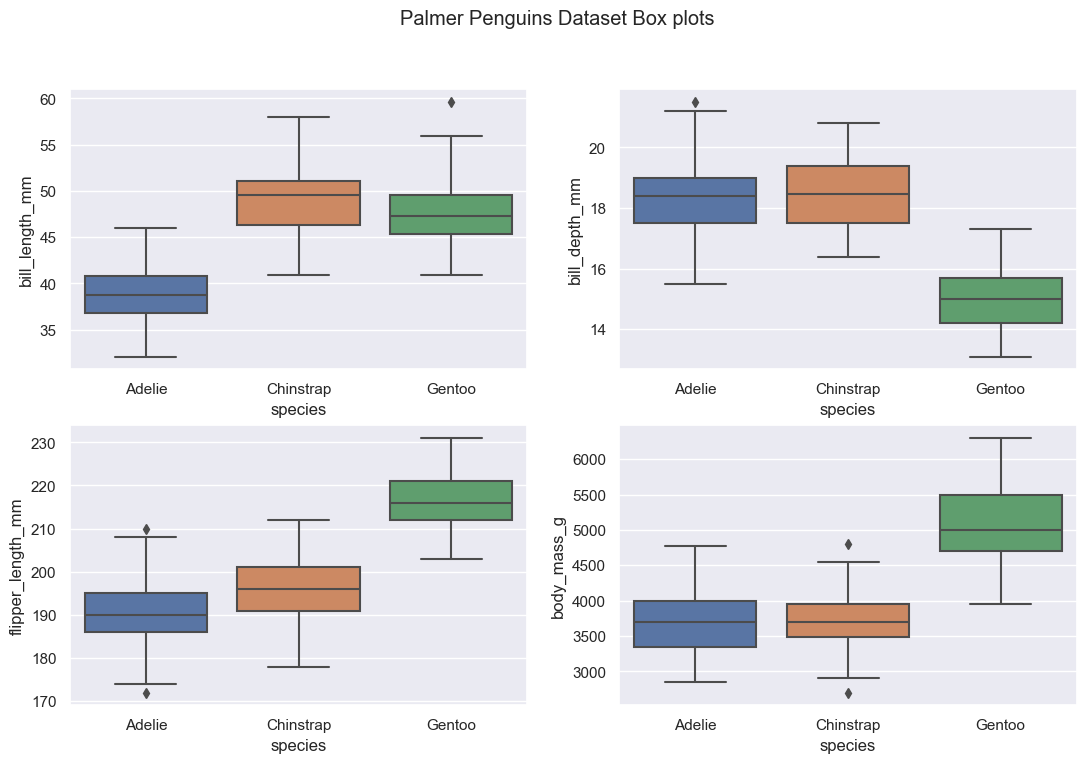

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots')

#creating chart for each subplot
sns.boxplot(data=penguin, x='species', y='bill_length_mm', ax = ax [0, 0])
sns.boxplot(data=penguin, x='species', y='bill_depth_mm', ax = ax [0, 1])
sns.boxplot(data=penguin, x='species', y='flipper_length_mm', ax = ax [1, 0])
sns.boxplot(data=penguin, x='species', y='body_mass_g', ax = ax [1, 1])


<Axes: xlabel='species', ylabel='body_mass_g'>

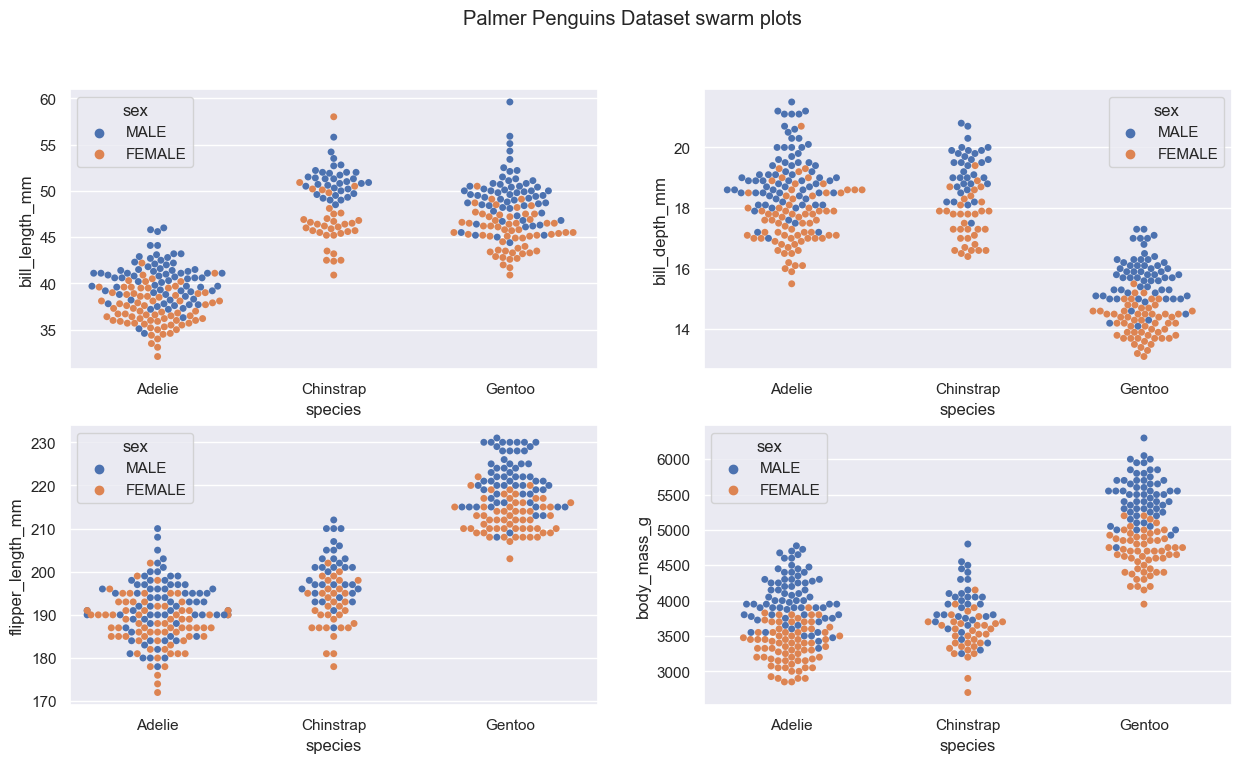

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.swarmplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex', ax = ax [0, 0])
sns.swarmplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.swarmplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.swarmplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])



<Axes: xlabel='species', ylabel='body_mass_g'>

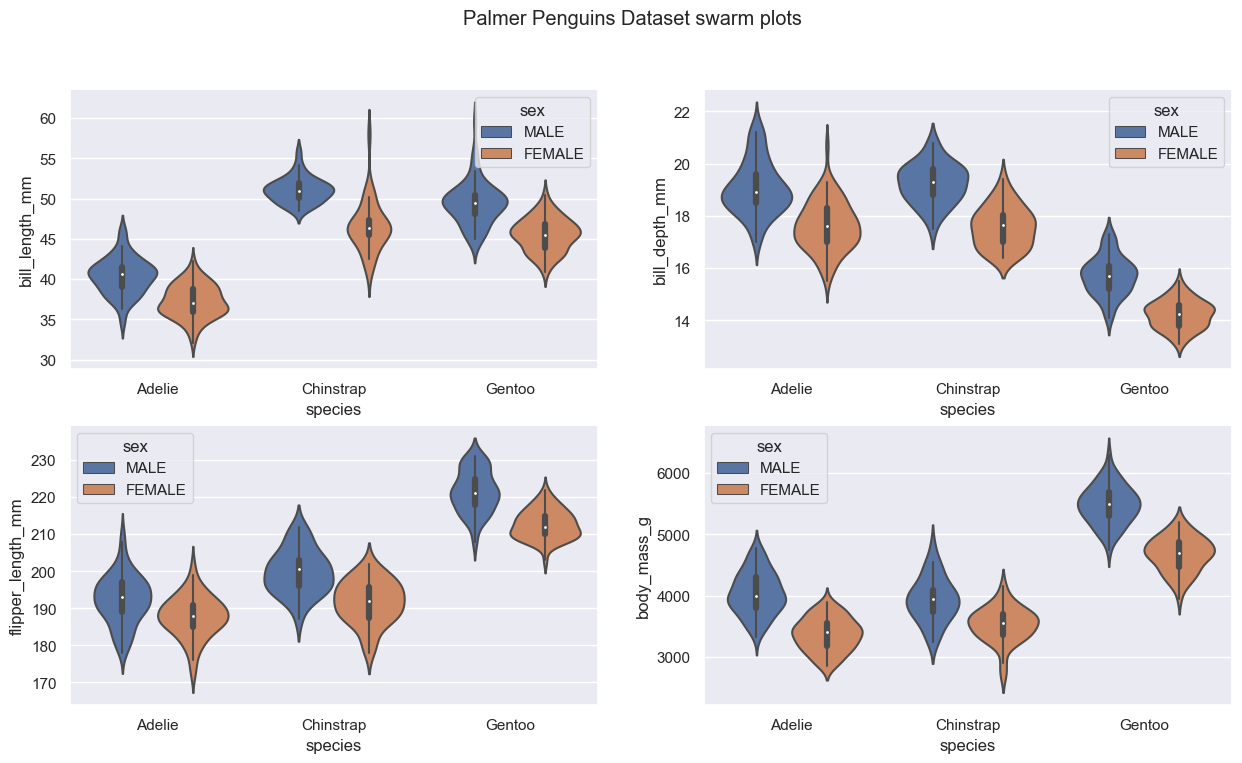

In [52]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex',  ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])

<Axes: xlabel='species', ylabel='body_mass_g'>

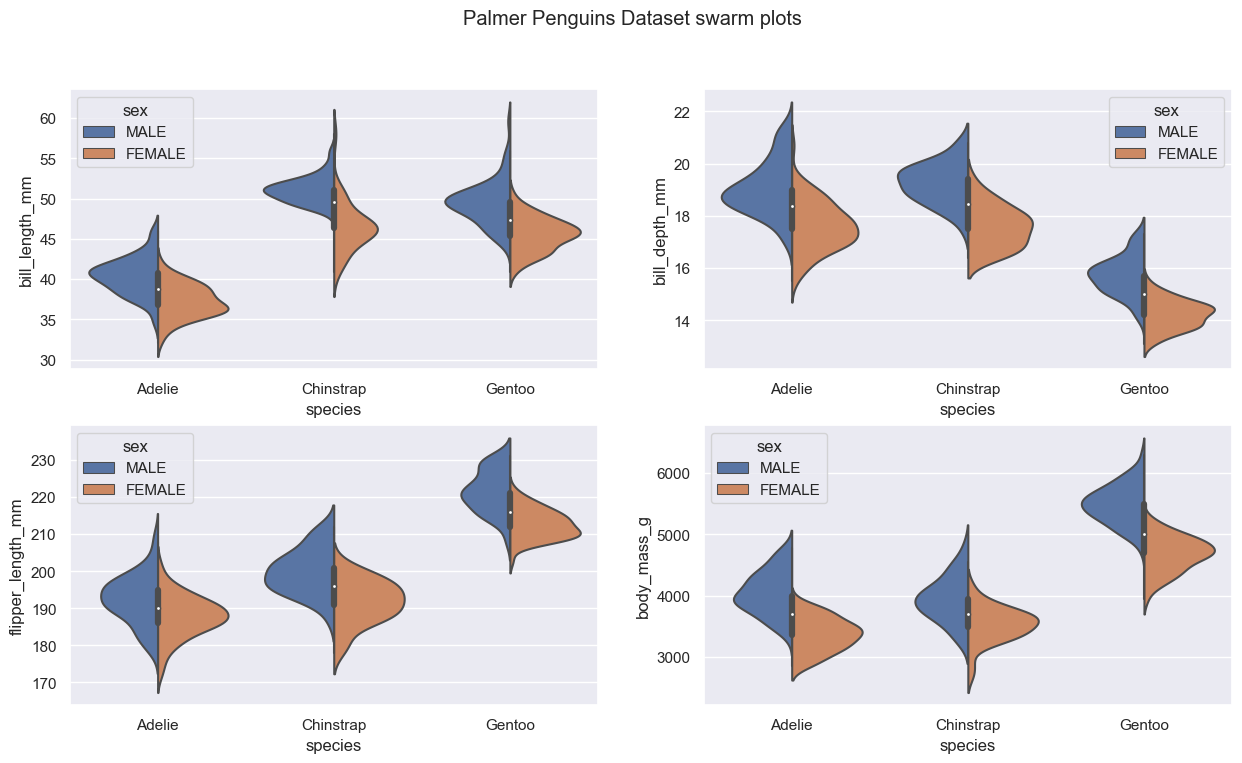

In [53]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex', split = True, ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', split = True, ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', split = True, ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', split = True, ax = ax [1, 1])



<Axes: xlabel='body_mass_g', ylabel='species'>

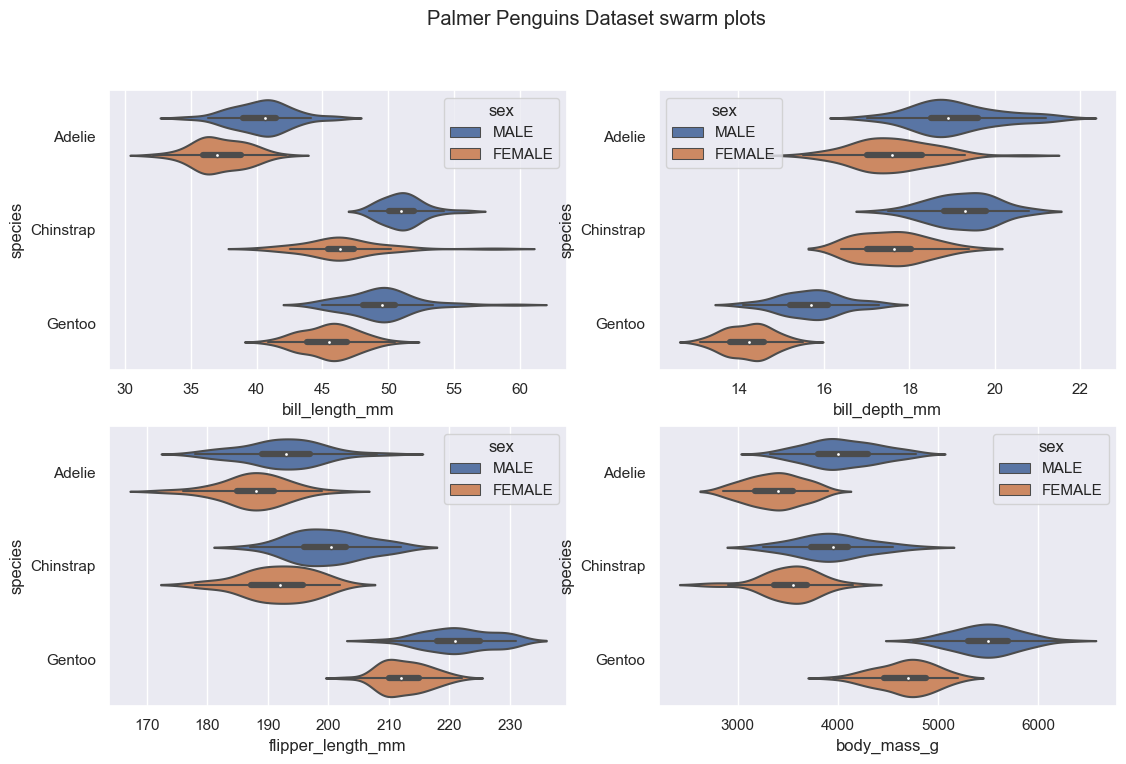

In [49]:
#creating chart for each subplot

fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

sns.violinplot(data=penguin,  x='bill_length_mm', y='species', hue = 'sex', ax = ax [0, 0])
sns.violinplot(data=penguin,  x='bill_depth_mm', y='species', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin,  x='flipper_length_mm', y='species', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin,  x='body_mass_g', y='species', hue = 'sex', ax = ax [1, 1])


<Axes: xlabel='species', ylabel='bill_depth_mm'>

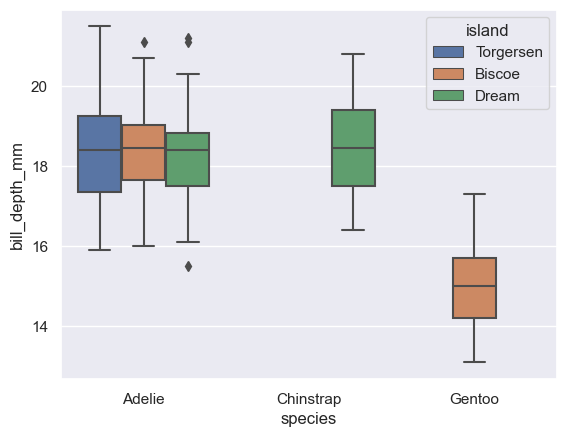

In [24]:
sns.boxplot(data=penguin, x='species', y='bill_depth_mm', hue='island')

<Axes: xlabel='species', ylabel='bill_length_mm'>

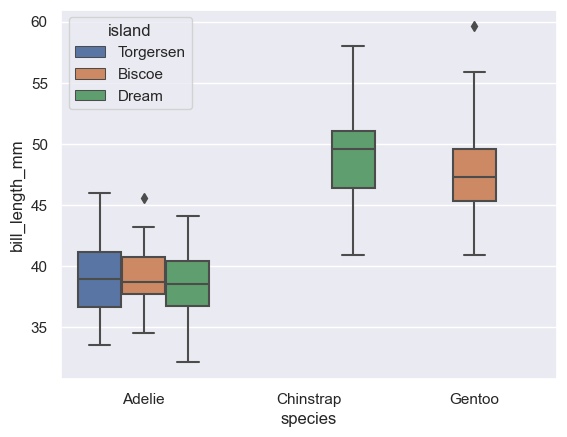

In [25]:
sns.boxplot(data=penguin, x='species', y='bill_length_mm', hue='island')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


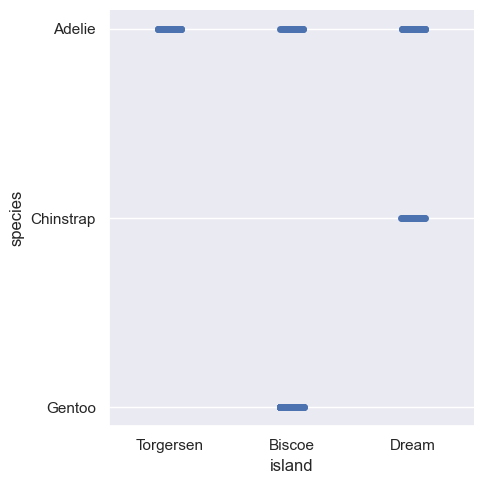

In [26]:
sns.catplot(data=penguin, x="island", y="species")

### catplot of Palmer penguins Species vs Island seen

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


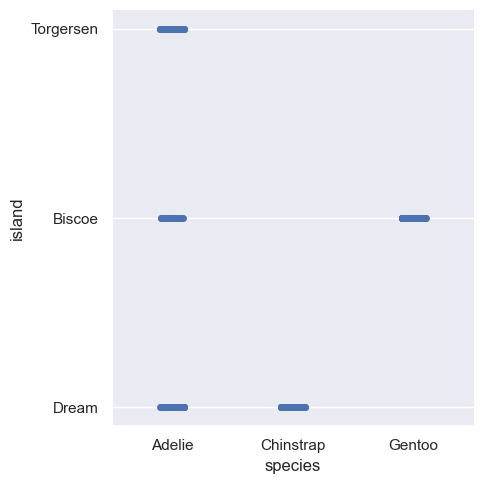

In [27]:
sns.catplot(data=penguin, x='species', y='island')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


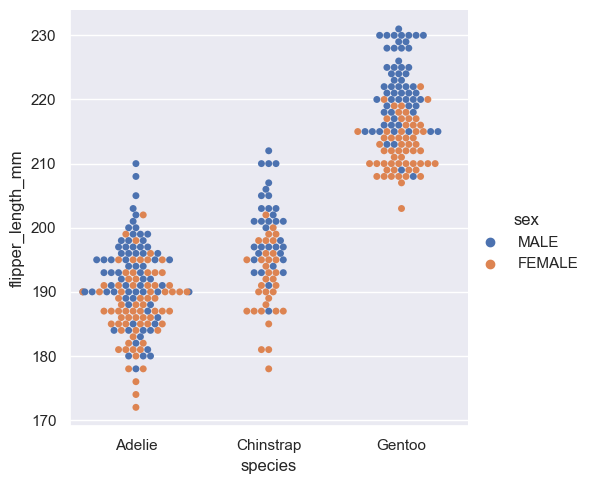

In [28]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex', kind = 'swarm')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


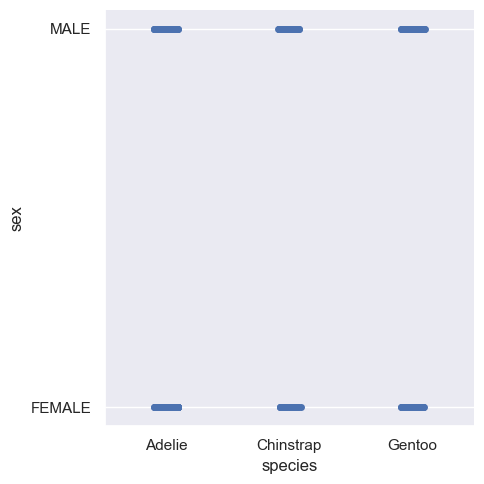

In [29]:
sns.catplot(data=penguin, x= 'species', y= 'sex')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


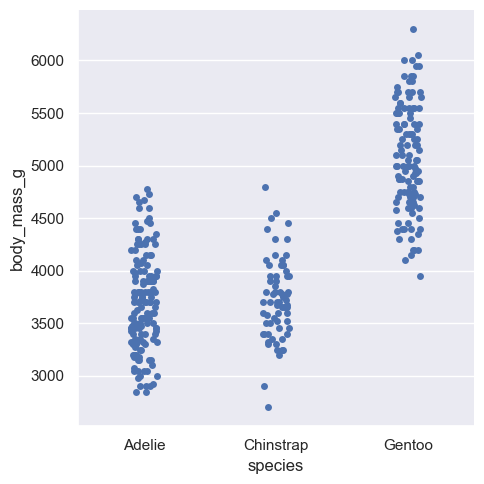

In [30]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


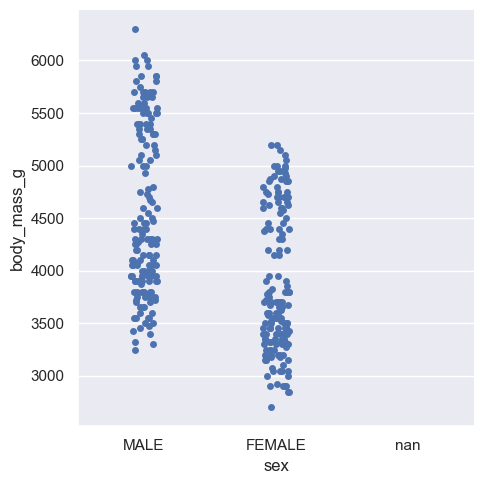

In [31]:
sns.catplot(data=penguin, x= 'sex', y= 'body_mass_g')

### correlations
### mean weight for each species
male weighs more than female
male

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


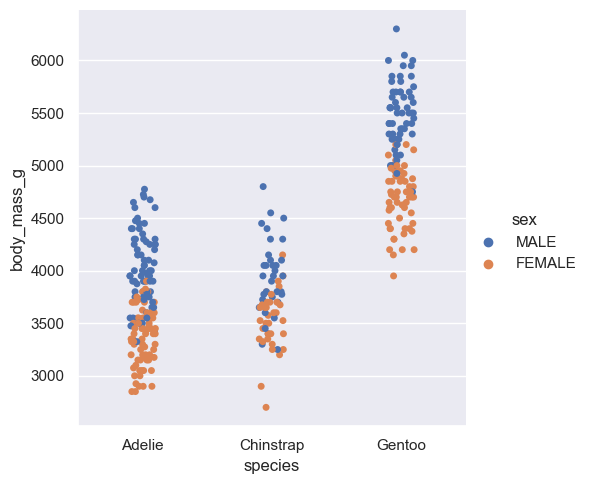

In [32]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


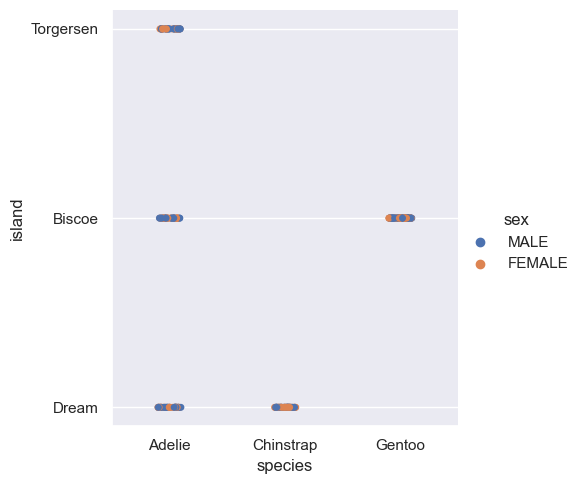

In [33]:
sns.catplot(data=penguin, x= 'species', y= 'island', hue = 'sex') 


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


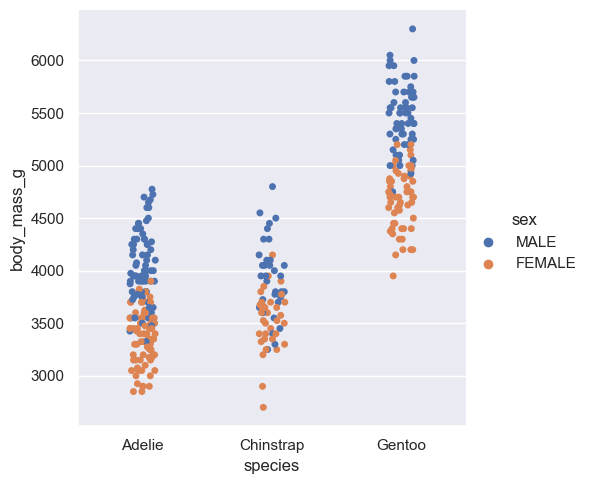

In [34]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex') 

In [35]:
#correlation between specie and body mass
#correlation between sex and body mass

In [36]:
#getting the numpy array
blength = blen.to_numpy()
print (blength)

[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 37.8 41.1 38.6
 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5
 37.9 40.5 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8
 36.  44.1 37.  39.6 41.1 37.5 36.  42.3 39.6 40.1 35.  42.  34.5 41.4
 39.  40.6 36.5 37.6 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8
 33.5 39.7 39.6 45.8 35.5 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1
 37.3 41.3 36.3 36.9 38.3 38.9 35.7 41.1 34.  39.6 36.2 40.8 38.1 40.3
 33.1 43.2 35.  41.  37.7 37.8 37.9 39.7 38.6 38.2 38.1 43.2 38.1 45.6
 39.7 42.2 39.6 42.7 38.6 37.3 35.7 41.1 36.2 37.7 40.2 41.4 35.2 40.6
 38.8 41.5 39.  44.1 38.5 43.1 36.8 37.5 38.1 41.1 35.6 40.2 37.  39.7
 40.2 40.6 32.1 40.7 37.3 39.  39.2 36.6 36.  37.8 36.  41.5 46.5 50.
 51.3 45.4 52.7 45.2 46.1 51.3 46.  51.3 46.6 51.7 47.  52.  45.9 50.5
 50.3 58.  46.4 49.2 42.4 48.5 43.2 50.6 46.7 52.  50.5 49.5 46.4 52.8
 40.9 54.2 42.5 51.  49.7 47.5 47.6 52.  46.9 53.5 49.  46.2 50.9 45.5
 50.9 5

In [37]:
bdept = bdepth.to_numpy()
print (bdept)

[18.7 17.4 18.   nan 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2
 21.1 17.8 19.  20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9
 18.6 18.9 16.7 18.1 17.8 18.9 17.  21.1 20.  18.5 19.3 19.1 18.  18.4
 18.5 19.7 16.9 18.8 19.  18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6
 17.5 18.8 16.6 19.1 16.9 21.1 17.  18.2 17.1 18.  16.2 19.1 16.6 19.4
 19.  18.4 17.2 18.9 17.5 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4
 17.8 20.3 19.5 18.6 19.2 18.8 18.  18.1 17.1 18.1 17.3 18.9 18.6 18.5
 16.1 18.5 17.9 20.  16.  20.  18.6 18.9 17.2 20.  17.  19.  16.5 20.3
 17.7 19.5 20.7 18.3 17.  20.5 17.  18.6 17.2 19.8 17.  18.5 15.9 19.
 17.6 18.3 17.1 18.  17.9 19.2 18.5 18.5 17.6 17.5 17.5 20.1 16.5 17.9
 17.1 17.2 15.5 17.  16.8 18.7 18.6 18.4 17.8 18.1 17.1 18.5 17.9 19.5
 19.2 18.7 19.8 17.8 18.2 18.2 18.9 19.9 17.8 20.3 17.3 18.1 17.1 19.6
 20.  17.8 18.6 18.2 17.3 17.5 16.6 19.4 17.9 19.  18.4 19.  17.8 20.
 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6 19.9 19.5 17.5 19.1 17.
 17.9 18.

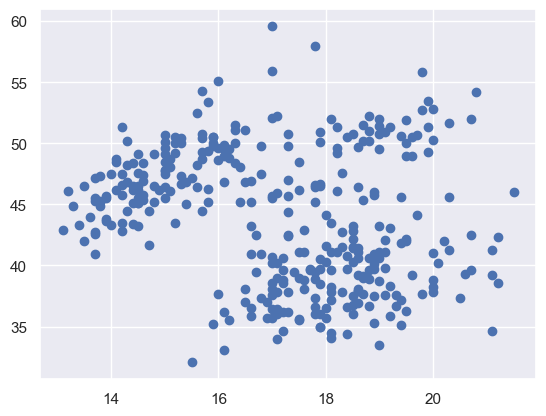

In [38]:
#simple plot
plt.plot(bdept, blength, 'o')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


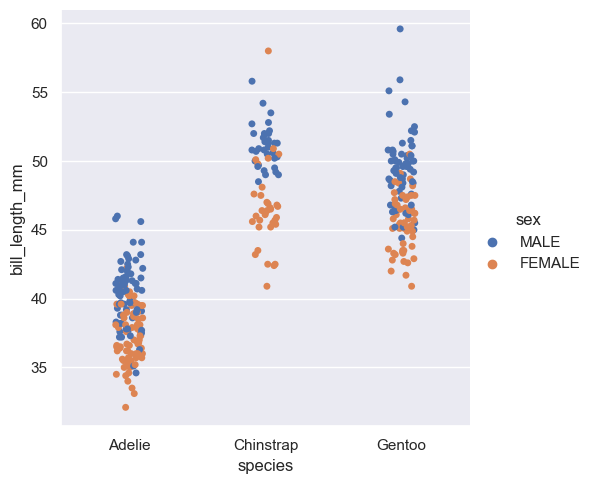

In [39]:
sns.catplot(data=penguin, x= 'species', y= 'bill_length_mm', hue = 'sex')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


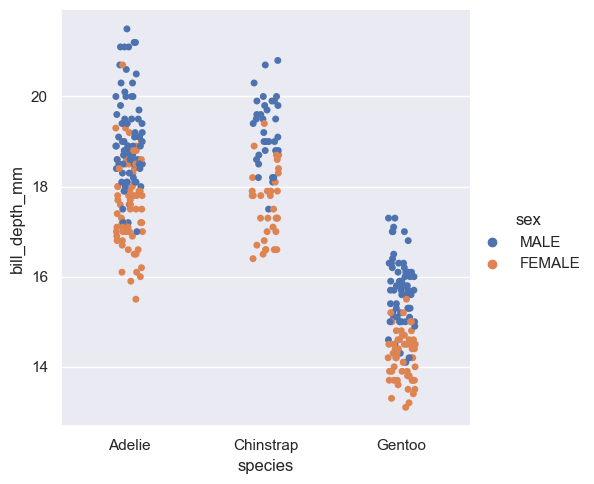

In [40]:
sns.catplot(data=penguin, x= 'species', y= 'bill_depth_mm', hue = 'sex')



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


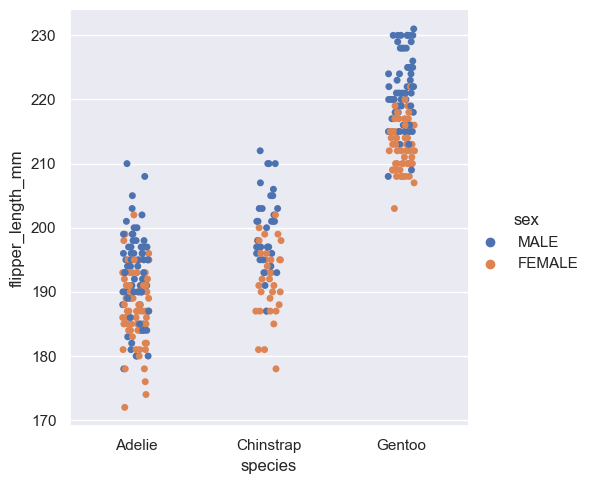

In [41]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex')

(0.0, 65.0)

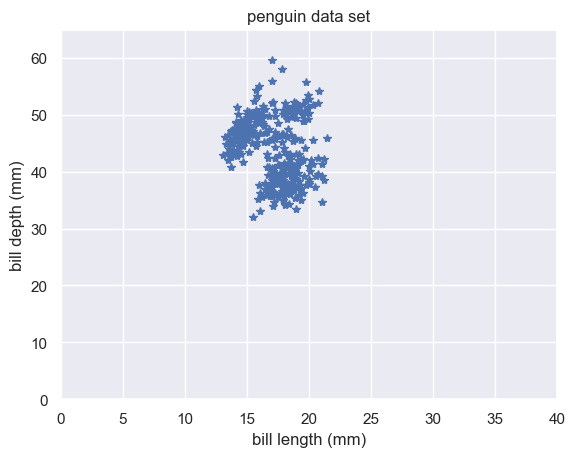

In [42]:
#simple plot
plt.plot(bdept, blength, '*')
plt.xlabel('bill length (mm)')
plt.ylabel('bill depth (mm)')
plt.title('penguin data set')
#setting the axis limit
plt.xlim(0,40)
plt.ylim(0, 65)

(20.0, 65.0)

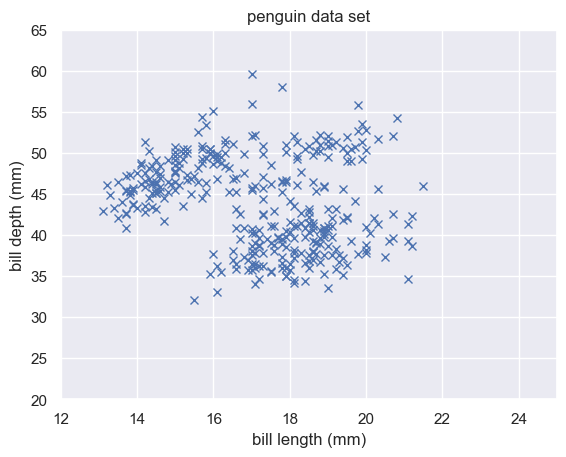

In [43]:
#stateless
fig, ax = plt.subplots()
ax.plot(bdept, blength, 'x')
ax.set_xlabel('bill length (mm)')
ax.set_ylabel('bill depth (mm)')
ax.set_title('penguin data set')
#setting the axis limit
#x limit
ax.set_xlim(12,25)
#y limits
ax.set_ylim(20, 65)
#add best fit line




#$ is used at the beginning and at the end of the equation  to render it in mathematical equation
#y = mx + c is used to find the linear relationsship btw x and y while m and c ae constant

$ y = mx + c = p_1x^1 + p_o = p_1 x + po $

In [44]:
#fitting a straight lin between bill lentgh and depth

m, c = np.polyfit (blength, bdept, 1)

# show 
#m, c

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
bill_length, bl_counts = penguin['bill_length_mm'].value_counts()

ValueError: too many values to unpack (expected 2)

In [ ]:
plt.bar(bill_length, bl_counts, edgecolor='black')

NameError: name 'bill_length' is not defined

In [ ]:
plt.bar(values, counts, edgecolor='black')

In [ ]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#converting to binary
345
f'{345:08b}'



'101011001'

In [ ]:
import numpy as np
print (np)

<module 'numpy' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>


In [ ]:

a = ([[1,2,3], [4,5,6], [7,8,9]])
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print (a)
a.dtype
a[:10]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
np.random.randint(a)
np.unique(a) #displayes each unique or distint number


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.unique(a, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [ ]:
# using numpy to generate random number
b = np.random.randint(1, 8, 2000) #how many times 7 no will be gen from 2000
np.unique(b)
b[:1000]
np.unique(b, return_counts=True) #used for counting
#def 2 variables and assign them to each number and the freq of occurence
number, frequency = np.unique(b, return_counts=True)



In [ ]:
#def 2 variables and assign them to each number and the freq of occurence
number, frequency = np.unique(b, return_counts=True)
print (number, frequency)
print (frequency)


[1 2 3 4 5 6 7] [276 297 275 278 291 284 299]
[276 297 275 278 291 284 299]


In [ ]:
np.mean(b) #generate mean
np.std(b) #generate std deviation
np.median(b) #generate median


4.0

<BarContainer object of 7 artists>

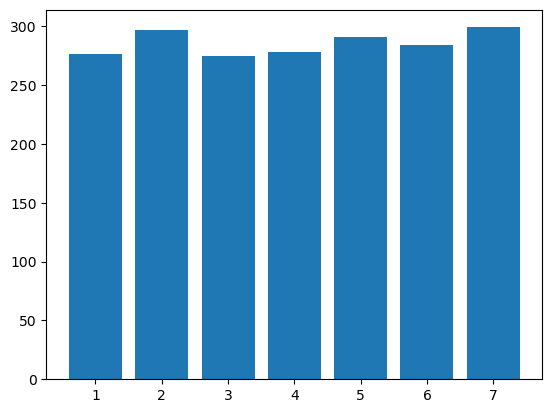

In [ ]:
#matplotlib is used for plotting bar charts in python
import matplotlib.pyplot as plt
#import numpy as np
#import matplotlib as mpl
plt.bar (number, frequency) #plot a bar chart of the 2 variables num, freq

In [ ]:
#generating random numbers with numpy
rng = np.random.default_rng()

In [ ]:
# Generate one random float uniformly distributed over the range [0, 1)
rng.random()  


0.1695659218761103

In [ ]:
# Generate an array of 10 numbers according to a unit Gaussian distribution.
rng.standard_normal(10)  

array([-0.72751635, -0.75330471, -0.77289158,  0.0717547 ,  0.960522  ,
        1.2816503 , -0.19313829, -0.24145012, -1.00474206,  0.25306592])

In [ ]:
# Generate an array of 5 integers uniformly over the range [0, 10).
rng.integers(low=0, high=10, size=5)

array([2, 1, 4, 5, 9], dtype=int64)

***
## End